Exercise. Modify the code so that:
    
    The nodes don't move. 

    Instead, after we select a node, we calculate a radius of a nbh and then we change the color (weight) of the  fractal's pixels in that nbh to the color in the center. 
    The code should have just a couple of iterations.
    Each iterations only 4 nodes are selected randomly.
    

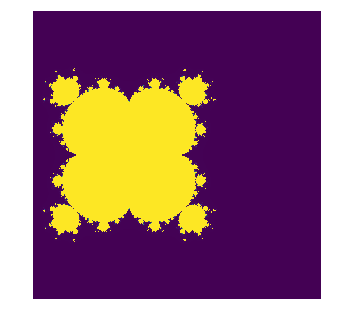

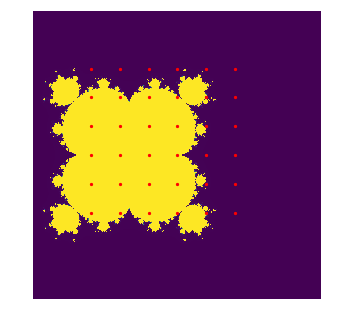

In [56]:

%matplotlib inline

import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import cmath
from copy import copy

class node():
    """The points consist of a coordinate and the color."""
    def __init__(self,x,y,v):
        self.c = x+y*1j
        self.v = v


def mandelbrot( h,w, maxit=500 ):
    """Returns an image of a variant of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.5:1.5:h*1j, -1:2:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in tqdm_notebook(range(maxit)):
        z = z**5 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 3                        # avoid diverging too much

    return divtime


Mandel = mandelbrot(500,500)

fig = plt.figure()

ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks

plt.imshow(Mandel)
plt.show()


###Here we define the auxiliary functions        
def decay(iteration,totalIterations):
    return np.exp(-iteration/totalIterations)

def findLocalNbh(Sigma):# a local NBH of radius sigma
    y,x = np.ogrid[ -Sigma:Sigma:(2*int(Sigma)+1)*1j, -Sigma:Sigma:(2*int(Sigma)+1)*1j ]
    c = x+y*1j
    tooBig = abs(c)<=Sigma
    print(len(tooBig))
    return tooBig
def findNbh(indexX,indexY,nodes, localNbh, Mandel=Mandel):# a local NBH of nodes[indexX][indexY] of radius sigma
    size = len(localNbh)//2
    
    miniMandel=Mandel[indexX.c.real-size:indexX.c.real+size,indexX.c.imag-size:indexX.c.imag+size]
    
    return newNbh
    
def findBMU(indexX,indexY,nodes):# the node that has closest value
    return nodes[indexX][indexY]

def limits(z):# we have a finite canvas
    #limits -1.5:1.5:h*1j, -1:2:
    if z.real>2:
        valReal = 2
    elif z.real<-1:
        valReal = -1
    else:
        valReal = z.real
    if z.imag>1.5:
        valImag = 1.5
    elif z.imag<-1.5:
        valImag = -1.5
    else:
        valImag = z.imag
    return valReal+valImag*1j, z == valReal+valImag*1j

### We are going to select nodes on the Mandelbrot set
nodes = np.zeros((6,6),dtype=object)
for x_values in range(2,8):
    for y_values in range(2,8):
        nodes[x_values-2][y_values-2]=node(50*x_values,50*y_values,Mandel[50*x_values,50*y_values])
        
fig = plt.figure()

ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks

plt.imshow(Mandel)

copyNodes = np.ravel(nodes)
for mark in tqdm_notebook(copyNodes):
    plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')

plt.show()


50.0  dist
101
--In iteration  0  we have radius  50.0
True (101, 101) (101, 101)
True (101, 101) (101, 101)
True (101, 101) (101, 101)


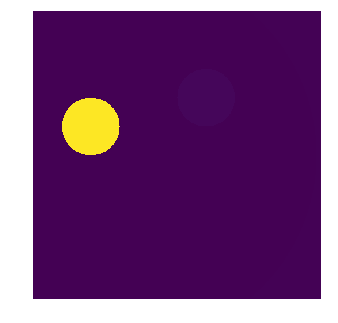

13.572088082974535  dist
27
--In iteration  1  we have radius  13.572088082974535
True (27, 27) (27, 27)
True (27, 27) (27, 27)
True (27, 27) (27, 27)


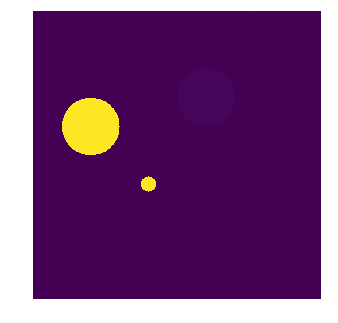

3.684031498640387  dist
7
--In iteration  2  we have radius  3.684031498640387
True (7, 7) (7, 7)
True (7, 7) (7, 7)
True (7, 7) (7, 7)


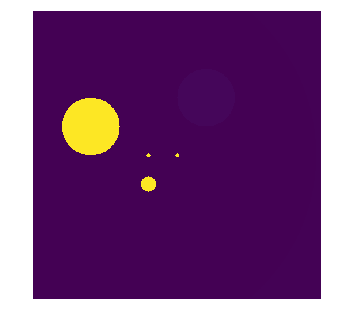

In [73]:
### parameters
numberOfIterations = 3
sigma_0=50
L_0=10
Julia2 = copy(Mandel)

for iteration in tqdm_notebook(range(numberOfIterations)):
    dec = decay(iteration,numberOfIterations/np.log(sigma_0))
    dist = sigma_0*dec
    print(dist, ' dist')
    nbh = findLocalNbh(dist) # returns a indicator set of positions
    print('--In iteration ', iteration,' we have radius ',dist)
    
    fig = plt.figure()

    ax = fig.add_axes([0., 0., 1., 1., ])
    # Hide grid lines
    ax.grid(False)
    ax.axis('off')
    # Hide axes ticks
    
    for i in range(3):
        toChange = []
        x_values = np.random.randint(0,6)
        y_values = np.random.randint(0,6)
        BMU = nodes[x_values][y_values]
        
        miniMandel = Julia2[int(BMU.c.real-int(dist)):int(BMU.c.real+int(dist))+1, int(BMU.c.imag-int(dist)):int(BMU.c.imag+int(dist))+1]
        print(miniMandel.shape == nbh.shape,miniMandel.shape, nbh.shape,)
        
        miniMandel[nbh] = BMU.v##BMU.v##+L_0*dec*(BMU.v-miniMandel)

    
    plt.imshow(Julia2)
    plt.show()

    

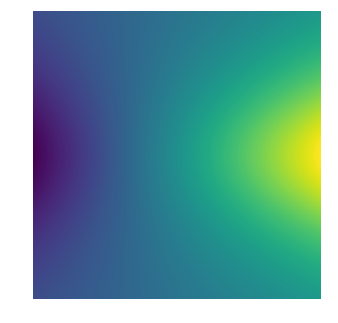

50.0  dist
101
--In iteration  0  we have radius  50.0
True (101, 101) (101, 101)


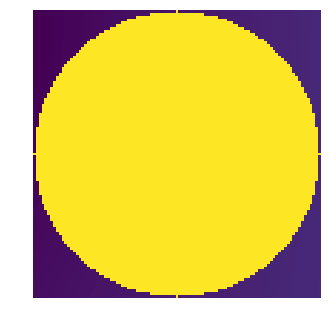

True (101, 101) (101, 101)


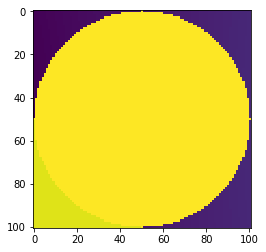

True (101, 101) (101, 101)


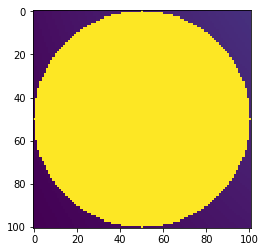

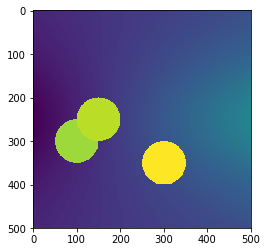

13.572088082974535  dist
27
--In iteration  1  we have radius  13.572088082974535
True (27, 27) (27, 27)


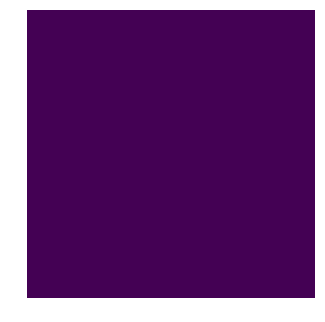

True (27, 27) (27, 27)


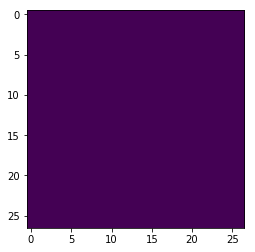

True (27, 27) (27, 27)


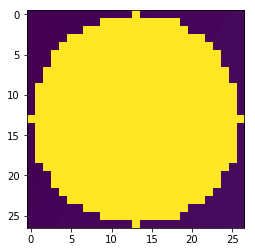

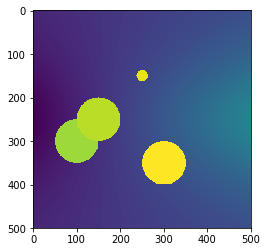

3.684031498640387  dist
7
--In iteration  2  we have radius  3.684031498640387
True (7, 7) (7, 7)


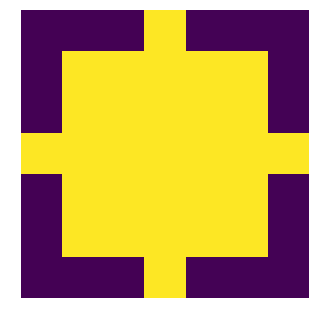

True (7, 7) (7, 7)


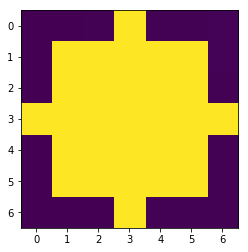

True (7, 7) (7, 7)


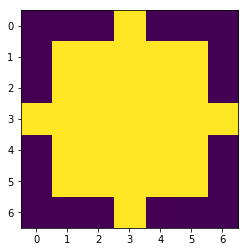

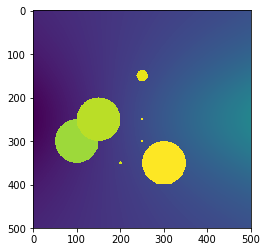

In [98]:
y,x = np.ogrid[ -1.5:1.5:500*1j, -1:2:500*1j ]
Mandel = (x/(y**2+1))

fig = plt.figure()

ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks

plt.imshow(Mandel)


plt.show()
### parameters
numberOfIterations = 3
sigma_0=50
L_0=10
Julia2 = copy(Mandel)

nodes = np.zeros((6,6),dtype=object)
for x_values in range(2,8):
    for y_values in range(2,8):
        nodes[x_values-2][y_values-2]=node(50*x_values,50*y_values,Mandel[50*x_values,50*y_values])
        
for iteration in tqdm_notebook(range(numberOfIterations)):
    dec = decay(iteration,numberOfIterations/np.log(sigma_0))
    dist = sigma_0*dec
    print(dist, ' dist')
    nbh = findLocalNbh(dist) # returns a indicator set of positions
    print('--In iteration ', iteration,' we have radius ',dist)
    
    fig = plt.figure()

    ax = fig.add_axes([0., 0., 1., 1., ])
    # Hide grid lines
    ax.grid(False)
    ax.axis('off')
    # Hide axes ticks
    
    for i in range(3):
        toChange = []
        x_values = np.random.randint(0,6)
        y_values = np.random.randint(0,6)
        BMU = nodes[x_values][y_values]
        
        miniMandel = Julia2[int(BMU.c.real-int(dist)):int(BMU.c.real+int(dist))+1, int(BMU.c.imag-int(dist)):int(BMU.c.imag+int(dist))+1]
        print(miniMandel.shape == nbh.shape,miniMandel.shape, nbh.shape,)
        
        miniMandel[nbh] = BMU.v+5##BMU.v##+L_0*dec*(BMU.v-miniMandel)
        plt.imshow(miniMandel)
        plt.show()

         
    plt.imshow(Julia2)
    plt.show()

    